In [37]:
import os

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

DATADIR = "./input"

In [34]:
df_train = pd.read_csv(
    os.path.join(DATADIR, "gender_age_train.csv"), index_col="device_id"
)
df_train['is_female'] = (df_train['gender'] == 'F').astype(int)
df_train.shape

(74645, 4)

## Domographic groups

In [66]:
df_train.groupby('group').agg({"age": ["mean", "std"], "is_female": ["mean", "count"]})

age           is_female      
             mean       std      mean count
group                                      
F23-    20.969109  1.746863         1  5050
F24-26  25.095465  0.817833         1  4190
F27-28  27.479474  0.499659         1  3118
F29-32  30.251296  1.111539         1  4628
F33-42  36.653659  2.855417         1  5561
F43+    51.622794  8.071190         1  4194
M22-    20.206597  1.707759         0  7488
M23-26  24.647163  1.120650         0  9605
M27-28  27.476033  0.499471         0  5445
M29-31  29.894103  0.803662         0  7309
M32-38  34.530709  1.932040         0  9476
M39+    47.104184  7.835465         0  8581

[Text(0.5, 1.0, 'Distribution of devices by demographic group')]

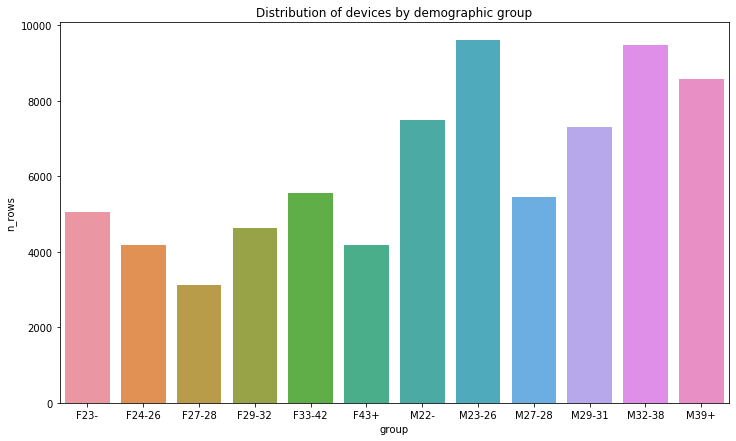

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df = df_train.groupby('group').agg({"age": "count"}).reset_index()
df.rename({"age": "n_rows"}, axis=1, inplace=True)
sns.barplot(x="group", y="n_rows", data=df)
ax.set(title="Distribution of devices by demographic group")

[Text(0.5, 1.0, 'Distribution of age by Gender')]

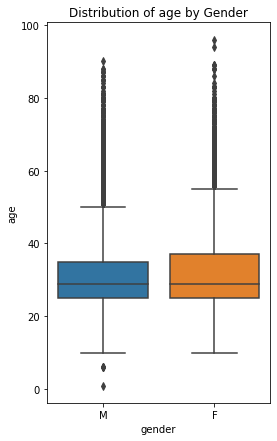

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(4,7))

sns.boxplot(
    y = "age",
    x = "gender",
    data = df_train
)
ax.set(title="Distribution of age by Gender")

## Apps, apps labels